In [104]:
import numpy as np
import simplicial as sc
from scipy.spatial import Delaunay

In [116]:
def generate_pts(mode, num_pts=100):
    if mode == 0:
        nx, ny = 10, 10
        x = np.linspace(-1, 1, nx)
        y = np.linspace(-1, 1, ny)
        xv, yv = np.meshgrid(x, y)
        xv, yv = xv.ravel(), yv.ravel()
        pts = np.array([(xv[i], yv[i]) for i in range(xv.shape[0])])
    else:
        pts = 2 * np.random.random((num_pts, 2)) - 1
    return pts

def simp_from_pts(pts):
    tri = Delaunay(pts).simplices
    faces = [x for x in tri if len(set(x)) == 3] # face has 3 distinct nodes
    faces = [tuple(sorted(x)) for x in faces]      # sort node order 

    edge_idx_dict, edge_dict = {}, {}
    num_edge = 0

    for face in faces:
        n1, n2, n3 = face
        face_edges = [(n1, n2), (n1, n3), (n2, n3)]

        for edge in face_edges:
            if edge not in edge_dict:
                edge_dict[edge] = num_edge
                edge_idx_dict[num_edge] = edge
                num_edge += 1

    edges = [edge_idx_dict[i] for i in range(num_edge)]

    edges.sort(key=lambda x:x[0])
    faces.sort(key=lambda x:x[0])

    return edges, faces

def sc_from_pts(pts):
    simp_comp = sc.SimplicialComplex()
    edges, faces = simp_from_pts(pts)
    num_simps = len(pts) + len(edges) + len(faces)

    for i, pt in enumerate(pts):
        simp_comp.addSimplex(id=i, attr=(dict(pos = pt)))

    for edge in edges:
        simp_comp.addSimplexWithBasis(bs=edge)

    for face in faces:
        simp_comp.addSimplexWithBasis(bs=face)
    
    return simp_comp
    

In [117]:
num_pts = 400
pts = generate_pts(1, num_pts)
comp = sc_from_pts(pts)

KeyboardInterrupt: 

In [ ]:
hole1, hole2 = np.array([-0.5, -0.5]), np.array([0.5, 0.5])

hole1_idx = np.argsort(np.linalg.norm(pts - hole1, axis=1))[0]
hole2_idx = np.argsort(np.linalg.norm(pts - hole2, axis=1))[0]

comp.deleteSimplexWithBasis(bs=[hole1_idx])
comp.deleteSimplexWithBasis(bs=[hole2_idx])

In [ ]:
B0 = comp.boundaryOperator(1)
B1 = comp.boundaryOperator(2)
L = B0.T @ B0 + B1 @ B1.T

In [ ]:
elems = np.zeros( (comp.numberOfSimplicesOfOrder()[2], 3) )

for i, face in enumerate(comp.simplicesOfOrder(2)):
    elems[i,:] = list(comp.basisOf(face))

elems.shape

(168, 3)

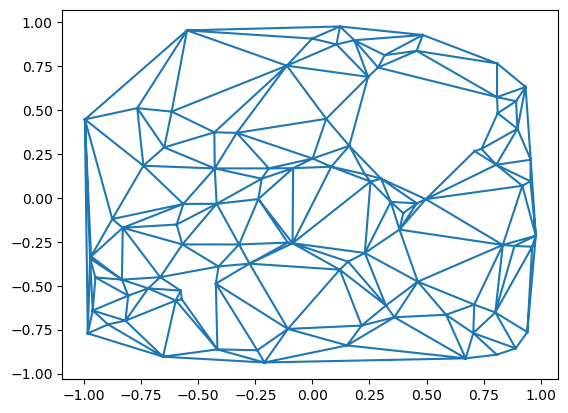

In [ ]:
import matplotlib.pyplot as plt

plt.triplot(pts[:,0], pts[:,1], elems)
plt.show()